In [1]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [2]:
from util import excel_table, graph, graph_fit
from util.structs import DataCluster, Dataset, Measurement
import numpy as np

### 232.a

In [3]:
Ampere_max = 100e-3;
Ampere_max_skt = 50;
Volt_max = 5
Volt_max_skt = 50;

In [4]:
table = excel_table.read("./data/232a.xlsx");
header = table[0]
print(header)
table = table[1:]
data = DataCluster();

for row in table:
    dset = Dataset({
        "U [skt]": Measurement(row[1], 1),
        "I [skt]": Measurement(row[2], 1),
    })
    data.add(dset)

data.print_2();

['R_E [ohm]' 'U [skt]' 'I [skt]']
I [skt]       | U [skt]      
--------------+--------------
( 23.0 ± 1.0) | ( 32.0 ± 1.0)
( 20.0 ± 1.0) | ( 27.0 ± 1.0)
( 15.0 ± 1.0) | ( 21.0 ± 1.0)
( 12.0 ± 1.0) | ( 17.0 ± 1.0)
( 10.0 ± 1.0) | ( 14.0 ± 1.0)
(  9.0 ± 1.0) | ( 12.0 ± 1.0)
(  8.0 ± 1.0) | ( 11.0 ± 1.0)
(  7.0 ± 1.0) | ( 10.0 ± 1.0)
(  5.0 ± 1.0) | (  7.0 ± 1.0)
(  3.0 ± 1.0) | (  4.0 ± 1.0)



In [ ]:
def get_value_from_skt(skt, skt_max, max_value):
    return max_value * (skt/skt_max);

for d in data:
    d["I [A]"] = get_value_from_skt(d["I [skt]"], Ampere_max_skt, Ampere_max)
    d["U [V]"] = get_value_from_skt(d["U [skt]"], Volt_max_skt, Volt_max)

data = data.copy_remove_index("I [skt]")
data = data.copy_remove_index("U [skt]")
data.print_2();
data.save_to_excel_measurements("./output/232.a")

I [A]            | U [V]           
-----------------+-----------------
( 46.0 ± 2.0)e-3 | ( 32.0 ± 1.0)e-1
( 40.0 ± 2.0)e-3 | ( 27.0 ± 1.0)e-1
( 30.0 ± 2.0)e-3 | ( 21.0 ± 1.0)e-1
( 24.0 ± 2.0)e-3 | ( 17.0 ± 1.0)e-1
( 20.0 ± 2.0)e-3 | ( 14.0 ± 1.0)e-1
( 18.0 ± 2.0)e-3 | ( 12.0 ± 1.0)e-1
( 16.0 ± 2.0)e-3 | ( 11.0 ± 1.0)e-1
( 14.0 ± 2.0)e-3 | ( 10.0 ± 1.0)e-1
( 10.0 ± 2.0)e-3 | (  7.0 ± 1.0)e-1
(  6.0 ± 2.0)e-3 | (  4.0 ± 1.0)e-1



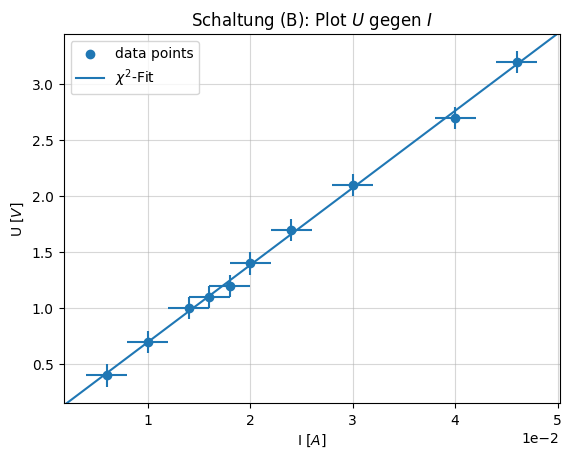

In [6]:
plot = graph.create_plot();
fig, ax = plot;

ax.grid(alpha=.5)

ax.set_title(r"Schaltung (B): Plot $U$ gegen $I$")
ax.set_xlabel(r"I $[A]$")
ax.set_ylabel(r"U $[V]$")
ax.ticklabel_format(scilimits=(5,10))

graph.scatter_data(data, "I [A]", "U [V]", plot=plot, label="data points")
func, params = graph_fit.Linear.on_data(data, "I [A]", "U [V]");
graph.plot_func(func, plot, change_viewport=False, label=r"$\chi^2$-Fit")

ax.legend()

fig.savefig("./output/plot_232a")
fig.savefig("./pdf/plot_232a.pdf")


In [7]:
print(params)

m: ( 68.9 ± 2.6), n: (  0.7 ± 6.6)e-2


### 232.b

Mit Schaltung (A) gilt:

$$
\begin{align*}
R_A = \frac{R_X R_U}{R_X + R_U} \\
(R_X + R_U) R_A = R_X R_U \\
R_X R_A + R_U R_A = R_X R_U \\
R_U R_A = R_X R_U - R_X R_A  \\
R_U R_A = R_X (R_U - R_A) \\
\frac{R_U R_A}{R_U - R_A} = R_X \\
\end{align*}
$$

In [8]:
def A_calc_R_X(R_A, R_U):
   return R_U * R_A / (R_U - R_A);

In [9]:
def calc_R_U(V_max = 5):
    # 2mA = maximal Ausschlag
    return V_max / 2e-3

In [10]:
R_A = params["m"];
R_U = calc_R_U(Volt_max)

R_X_calc_A = A_calc_R_X(R_A, R_U);
print(R_X_calc_A)

( 70.8 ± 2.7)


Mit Schaltung (B) gilt:
$$
R_{B} = R_{X} + R_{i}
$$

In [11]:
def B_calc_R_X(R_B, R_i):
   return R_B - R_i 

In [12]:
R_i_value = 50;
R_i = Measurement(R_i_value, 0.01 * R_i_value);
R_B = params["m"];

print(R_i)
print(R_B)

(500.0 ± 5.0)e-1
( 68.9 ± 2.6)


In [13]:
R_X_calc_B = B_calc_R_X(R_B, R_i);
print(R_X_calc_B)

( 18.9 ± 2.6)


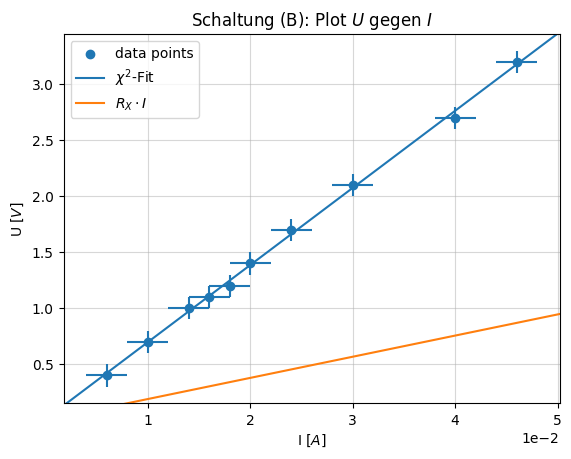

In [14]:
from IPython.display import display

func_2 = lambda x: x * R_X_calc_B.value;

graph.plot_func(func_2, plot, label=r"$R_X \cdot I$")

ax.legend()

# ax.set_ylim((-10, 10))

fig.savefig("./output/plot_232b");

display(fig)

### 232.c

In [15]:
DMM_read_value = 22.1
R_X_DMM = Measurement(DMM_read_value, 0.01 * DMM_read_value);
print(f"Gemessener Wert: {R_X_DMM}")
print(f"Berechneter Wert: {R_X_calc_B}")

Gemessener Wert: (221.0 ± 2.2)e-1
Berechneter Wert: ( 18.9 ± 2.6)


In [16]:
abweichung = (R_X_calc_A / R_X_DMM).value - 1;

print(f"Abweichung {abweichung*100}%")

Abweichung 220.5587378285606%
